<a href="https://colab.research.google.com/github/Onamihoang/CIFAR10_DL01/blob/master/Ban4k7Image_Rnd%3D0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
!ls "/content/drive/My Drive/DL01/FaceVn"

train  train.csv  train_refined.csv


In [0]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

directory = '/content/drive/My Drive/DL01/FaceVn/'
linklabel = directory + 'train.csv'
linkimage = directory + 'train/'

In [151]:
y = pd.read_csv(linklabel)
print(y)

import csv
with open(linklabel, newline='') as csvfile:
    data = list(csv.reader(csvfile))


del data[0]
print(data[2][0])
print(len(data))

                                     image  label
0     10b36d309a0c4baeafe312e55355ef47.png    399
1     18d2f368513a4abc93122047044aec08.png    881
2     24bf4e543ad247f38cafb8129b586e34.png    708
3     4e4cc09af7f94737b1d3856ca46906fc.png    739
4     046f525c3edc420c9f9e7303251c3eed.png    917
...                                    ...    ...
4715  399040f999514ba09814661f724028be.png    103
4716  e2c87eb9f97849b786c51d7cabbffb4f.png    225
4717  d0c4d2abdbd548cab1a1aeec3e9c3f77.png    552
4718  75186a13ddf645b3ae140315e9a9c58e.png    212
4719  ef37147f042548eaa613b7b3efac306c.png    326

[4720 rows x 2 columns]
24bf4e543ad247f38cafb8129b586e34.png
4720


In [144]:
!ls "/content/drive/My Drive/keras-facenet/model"

facenet_keras.h5


In [146]:
file_count = 0

for file in os.listdir(directory + "/train"):
    if file.endswith(".png"):
        file_count= file_count+1

print(file_count)


4720


In [147]:
!pip install mtcnn

In [0]:
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN


# tach khuon mat tu 1 buc anh
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array


def resize_face(filename, required_size=(160, 160)):
  image = Image.open(filename)
  image = image.resize(required_size)
  face_array = asarray(image)
  return face_array


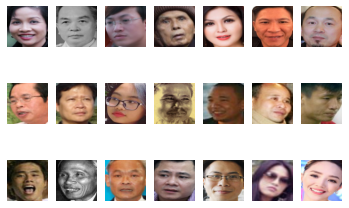

In [149]:
iconst = 1
# enumerate files
for i in range(21):
  face = resize_face(linkimage + data[i][0] )
  #print(i, face.shape)
  # plot
  pyplot.subplot(3, 7, iconst)
  pyplot.axis('off')
  pyplot.imshow(face)
  iconst += 1
pyplot.show()

In [152]:
# load anh trong kho theo label trong csv
def load_dataset(linkimage):
  X,y = list(), list()
  sodem,sodemcu  = 0,0
  for row in range(len(data)):
    face = resize_face(linkimage + data[row][0])
    label = data[row][1]
    sodem += 1
    if sodemcu < sodem//100 :
      print(">>> loaded %d00 anh. Ten la : %s" %(sodem//100,data[row][1]))
      sodemcu = sodem//100
    X.append(face)
    y.append(label)
  return asarray(X), asarray(y)

# load train dataset
trainX, trainy = load_dataset(linkimage)
print(trainX.shape, trainy.shape)
# dung sklearn chia thanh train va test
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(trainX, trainy, test_size = 0.2, random_state = 0)

# save arrays to one file in compressed format
savez_compressed('celebrity-faces-dataset.npz', trainX, testX, trainy, testy)

>>> loaded 100 anh. Ten la : 132
>>> loaded 200 anh. Ten la : 438
>>> loaded 300 anh. Ten la : 561
>>> loaded 400 anh. Ten la : 193
>>> loaded 500 anh. Ten la : 174
>>> loaded 600 anh. Ten la : 263
>>> loaded 700 anh. Ten la : 881
>>> loaded 800 anh. Ten la : 223
>>> loaded 900 anh. Ten la : 734
>>> loaded 1000 anh. Ten la : 584
>>> loaded 1100 anh. Ten la : 602
>>> loaded 1200 anh. Ten la : 332
>>> loaded 1300 anh. Ten la : 272
>>> loaded 1400 anh. Ten la : 448
>>> loaded 1500 anh. Ten la : 862
>>> loaded 1600 anh. Ten la : 361
>>> loaded 1700 anh. Ten la : 105
>>> loaded 1800 anh. Ten la : 529
>>> loaded 1900 anh. Ten la : 184
>>> loaded 2000 anh. Ten la : 979
>>> loaded 2100 anh. Ten la : 217
>>> loaded 2200 anh. Ten la : 865
>>> loaded 2300 anh. Ten la : 605
>>> loaded 2400 anh. Ten la : 336
>>> loaded 2500 anh. Ten la : 728
>>> loaded 2600 anh. Ten la : 990
>>> loaded 2700 anh. Ten la : 511
>>> loaded 2800 anh. Ten la : 241
>>> loaded 2900 anh. Ten la : 564
>>> loaded 3000 anh. Te

In [162]:
# su dung model facenet keras voi bo du lieu 1 trieu ng noi tieng the gioi
from keras.models import load_model
# load the model
model = load_model('/content/drive/My Drive/keras-facenet/model/facenet_keras.h5')
# kiem tra input va output shape
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1_5:0' shape=(?, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm_5/cond/Merge:0' shape=(?, 128) dtype=float32>]


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [175]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed



# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]

# load the face dataset
data = load('celebrity-faces-dataset.npz')
trainX, testX, trainy, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, testX.shape, trainy.shape, testy.shape)

# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
print("done test")
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
print("done train")

# save arrays to one file in compressed format
savez_compressed('celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (3776, 160, 160, 3) (944, 160, 160, 3) (3776,) (944,)
(944, 128)
done test
(3776, 128)
done train


In [179]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
print("done normalize")
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
out_encoder.fit(testy)
testy = out_encoder.transform(testy)
print("done encode")
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=3776, test=944
done normalize
done encode
Accuracy: train=81.091, test=0.106
